**Chargement et Exploration initiale**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bs140513_032310.csv to bs140513_032310.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("DetectionFraud.csv", sep=',')

In [ ]:
print(df.shape)

(594643, 10)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [ ]:
print(df['category'].value_counts())

category
'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: count, dtype: int64


In [ ]:
print(df['fraud'].value_counts())

fraud
0    587443
1      7200
Name: count, dtype: int64


**Nettoyage des doublons et valeurs manquantes**

In [ ]:
df = df.drop_duplicates()
df = df.dropna()

In [ ]:
print(df['gender'].unique())
print(df['gender'].value_counts())


["'M'" "'F'" "'E'" "'U'"]
gender
'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: count, dtype: int64


nettoyage des valeurs de la colonne de gender avant encodage

In [ ]:
df['gender'] = df['gender'].str.replace("'", "").str.strip()
df['gender'] = df['gender'].apply(lambda x: x if x in ['M','F'] else 'UNKNOWN')

In [ ]:
print(df['gender'].value_counts())

gender
F          324565
M          268385
UNKNOWN      1693
Name: count, dtype: int64


**Nettoyage et encodage de la variable category**

In [ ]:
df['category'] = df['category'].str.replace('"', '').str.replace("'", '').str.strip()

In [ ]:
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [ ]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category mapping:", mapping)
print(df[['category']].head(20))

Category mapping: {'es_barsandrestaurants': np.int64(0), 'es_contents': np.int64(1), 'es_fashion': np.int64(2), 'es_food': np.int64(3), 'es_health': np.int64(4), 'es_home': np.int64(5), 'es_hotelservices': np.int64(6), 'es_hyper': np.int64(7), 'es_leisure': np.int64(8), 'es_otherservices': np.int64(9), 'es_sportsandtoys': np.int64(10), 'es_tech': np.int64(11), 'es_transportation': np.int64(12), 'es_travel': np.int64(13), 'es_wellnessandbeauty': np.int64(14)}
    category
0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12         4
13        12
14        12
15        12
16        12
17        12
18        12
19        12


In [ ]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4',M,'28007','M348934600','28007',12,4.55,0
1,0,'C352968107','2',M,'28007','M348934600','28007',12,39.68,0
2,0,'C2054744914','4',F,'28007','M1823072687','28007',12,26.89,0
3,0,'C1760612790','3',M,'28007','M348934600','28007',12,17.25,0
4,0,'C757503768','5',M,'28007','M348934600','28007',12,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3',F,'28007','M1823072687','28007',12,20.53,0
594639,179,'C650108285','4',F,'28007','M1823072687','28007',12,50.73,0
594640,179,'C123623130','2',F,'28007','M349281107','28007',2,22.44,0
594641,179,'C1499363341','5',M,'28007','M1823072687','28007',12,14.46,0


**Nettoyage et normalisation de la colonne age**

In [ ]:
import pandas as pd
import numpy as np

# Fonction pour nettoyer age
def clean_age(x):
    try:
        # Supprimer quotes si présent
        x = str(x).replace("'", "")
        # Convertir en int
        return int(x)
    except:
        # Si erreur (ex: 'U'), retourner NaN
        return np.nan

# Appliquer la fonction
df['age'] = df['age'].apply(clean_age)

# Remplacer NaN par la médiane
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age).astype(int)

# Vérifier
print(df['age'].unique())
print(df['age'].head())


[4 2 3 5 1 6 0]
0    4
1    2
2    4
3    3
4    5
Name: age, dtype: int64


**standardisation de amount(pour K-Means seulement)**

In [ ]:
# Montant standardisé
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['amount'] = scaler.fit_transform(df[['amount']])


**encodage des variables catégorielles **

In [ ]:
cols_to_encode = ['gender', 'zipcodeOri', 'zipMerchant', 'customer', 'merchant']

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [ ]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,210,4,1,0,30,0,12,-0.299276,0
1,0,2753,2,1,0,30,0,12,0.016067,0
2,0,2285,4,0,0,18,0,12,-0.098742,0
3,0,1650,3,1,0,30,0,12,-0.185275,0
4,0,3585,5,1,0,30,0,12,-0.019480,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,1639,3,0,0,18,0,12,-0.155832,0
594639,179,3369,4,0,0,18,0,12,0.115256,0
594640,179,529,2,0,0,31,0,2,-0.138687,0
594641,179,1083,5,1,0,18,0,12,-0.210319,0


# Cluster-based undersampling (équilibrage du dataset)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
# Separate majority class (fraud=0)
X_majority = df[df['fraud'] == 0].drop('fraud', axis=1)

In [ ]:
# Choose number of clusters (number of majority rows you want to keep)
n_clusters = 10_000  # adjust based on memory

**Applique MiniBatchKMeans pour regrouper ces données massives en 10 000 clusters (plus léger que le dataset complet).**

In [ ]:
# MiniBatchKMeans for large datasets
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=20000)
kmeans.fit(X_majority)

MiniBatchKMeans(batch_size=20000, n_clusters=10000, random_state=42)

Sélectionner le point le plus proche du centre de chaque cluster (représentatif).
Conserver ainsi 10 000 exemples non frauduleux au lieu de millions.

In [ ]:
# Keep rows closest to cluster centers
closest_indices = []
for i in range(n_clusters):
    cluster_points = np.where(kmeans.labels_ == i)[0]
    center = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(X_majority.iloc[cluster_points] - center, axis=1)
    closest_idx = cluster_points[np.argmin(distances)]
    closest_indices.append(closest_idx)

In [ ]:
# Reduced majority dataset
X_majority_reduced = X_majority.iloc[closest_indices]
y_majority_reduced = pd.Series([0]*len(closest_indices))

In [ ]:
print("Original majority size:", X_majority.shape[0])
print("Reduced majority size:", X_majority_reduced.shape[0])

Original majority size: 587443
Reduced majority size: 10000


In [ ]:
# Combine the reduced majority with its label
df_majority_reduced = X_majority_reduced.copy()
df_majority_reduced['fraud'] = y_majority_reduced.values

In [ ]:
# Concatenate with the minority class (fraud = 1) to get the final dataset
df_minority = df[df['fraud'] == 1]
df_balanced = pd.concat([df_majority_reduced, df_minority], axis=0).reset_index(drop=True)

In [ ]:
print("Final dataset shape:", df_balanced.shape)


Final dataset shape: (17200, 10)


In [ ]:
# Show first rows
print(df_balanced.head(20))

    step  customer  age  gender  zipcodeOri  merchant  zipMerchant  category  \
0     39      4088    5       0           0        18            0        12   
1    155       935    3       1           0        18            0        12   
2    135      2557    4       0           0        18            0        12   
3    149      1607    4       0           0        30            0        12   
4     61       245    2       0           0        30            0        12   
5    116      3311    4       0           0        30            0        12   
6     36      2055    5       0           0        30            0        12   
7    113      3708    2       0           0        18            0        12   
8    101      2975    4       1           0        18            0        12   
9     52      1176    2       0           0        30            0        12   
10    32       328    3       1           0        45            0         3   
11    18      2237    4       1         

In [ ]:
df_balanced

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,39,4088,5,0,0,18,0,12,-0.134379,0
1,155,935,3,1,0,18,0,12,-0.210588,0
2,135,2557,4,0,0,18,0,12,-0.030072,0
3,149,1607,4,0,0,30,0,12,0.201251,0
4,61,245,2,0,0,30,0,12,-0.224861,0
...,...,...,...,...,...,...,...,...,...,...
17195,179,2456,5,1,0,32,0,8,1.390360,1
17196,179,3357,5,0,0,16,0,14,0.040213,1
17197,179,2522,3,0,0,16,0,14,4.344147,1
17198,179,544,2,0,0,27,0,14,-0.113104,1


**Comparer l’effet de la standardisation sur les analyses.**
df_balanced_std → pour le clustering et analyses de patterns globaux


df_balanced_no_std → pour la compréhension métier (montants réels)

In [ ]:
df_balanced_std = df_balanced.copy()  # version avec montant standardisé
df_balanced_no_std = df_balanced.copy()
df_balanced_no_std['amount'] = scaler.inverse_transform(df_balanced_no_std[['amount']])

In [ ]:
df_balanced_no_std

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,39,4088,5,0,0,18,0,12,22.92,0
1,155,935,3,1,0,18,0,12,14.43,0
2,135,2557,4,0,0,18,0,12,34.54,0
3,149,1607,4,0,0,30,0,12,60.31,0
4,61,245,2,0,0,30,0,12,12.84,0
...,...,...,...,...,...,...,...,...,...,...
17195,179,2456,5,1,0,32,0,8,192.78,1
17196,179,3357,5,0,0,16,0,14,42.37,1
17197,179,2522,3,0,0,16,0,14,521.84,1
17198,179,544,2,0,0,27,0,14,25.29,1


# **Analyse descriptive globale**

dimension et types des variables

In [ ]:
df_balanced.info()
df_balanced.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17200 entries, 0 to 17199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         17200 non-null  int64  
 1   customer     17200 non-null  int64  
 2   age          17200 non-null  int64  
 3   gender       17200 non-null  int64  
 4   zipcodeOri   17200 non-null  int64  
 5   merchant     17200 non-null  int64  
 6   zipMerchant  17200 non-null  int64  
 7   category     17200 non-null  int64  
 8   amount       17200 non-null  float64
 9   fraud        17200 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.3 MB


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,17200.000000,17200.000000,17200.000000,17200.000000,17200.0,17200.000000,17200.0,17200.000000,17200.000000,17200.000000
mean,91.705930,2066.506221,2.937674,0.407151,0.0,27.700523,0.0,9.540174,1.819220,0.418605
std,51.475202,1170.452664,1.176331,0.494855,0.0,12.481606,0.0,3.647582,5.336446,0.493345
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.339849,0.000000
25%,47.750000,1027.000000,2.000000,0.000000,0.0,18.000000,0.0,6.000000,-0.142637,0.000000
50%,93.000000,2109.500000,3.000000,0.000000,0.0,30.000000,0.0,12.000000,0.073381,0.000000
75%,136.250000,3066.250000,4.000000,1.000000,0.0,34.000000,0.0,12.000000,2.008477,1.000000
max,179.000000,4111.000000,6.000000,2.000000,0.0,49.000000,0.0,14.000000,74.433269,1.000000


In [ ]:
for col in ['category','gender','zipcodeOri','zipMerchant']:
    print(col, df_balanced[col].nunique(), "valeurs uniques")
    print(df_balanced[col].unique()[:10])  # montre les 10 premières

category 15 valeurs uniques
[12  3  5 14  6  7  0  4  2 10]
gender 3 valeurs uniques
[0 1 2]
zipcodeOri 1 valeurs uniques
[0]
zipMerchant 1 valeurs uniques
[0]


**Taux de fraude après équilibrage**

In [ ]:
df_balanced['fraud'].value_counts(normalize=True)

,proportion
fraud,
0,0.581395
1,0.418605


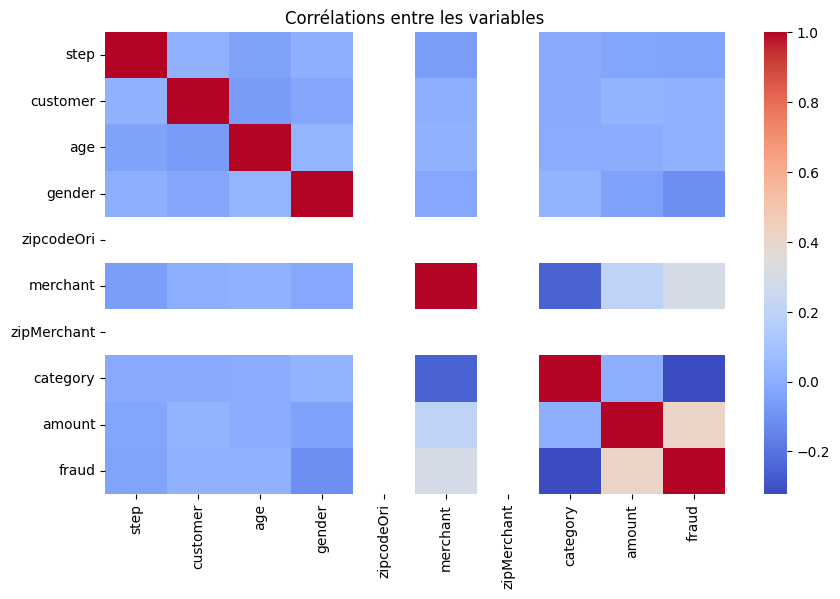

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_balanced.corr(), cmap='coolwarm', annot=False)
plt.title('Corrélations entre les variables')
plt.show()

In [ ]:
!pip install mlxtend --quiet

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


**Préparer un sous-ensemble utile du dataset**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
cols = ['category', 'gender', 'age', 'amount', 'fraud']
df_patterns = df_balanced_no_std[cols].copy()
df_patterns.head()

,category,gender,age,amount,fraud
0,12,0,5,22.92,0
1,12,1,3,14.43,0
2,12,0,4,34.54,0
3,12,0,4,60.31,0
4,12,0,2,12.84,0


**Discrétiser les variables continues**

In [ ]:
# Discrétisation du montant
df_patterns['amount_bin'] = pd.qcut(
    df_patterns['amount'],
    q=3,
    labels=['Bas', 'Moyen', 'Élevé']
)

# Discrétisation de l’âge (si utile)
df_patterns['age_bin'] = pd.cut(
    df_patterns['age'],
    bins=[0, 25, 40, 60, 100],
    labels=['Jeune', 'Adulte', 'Mature', 'Senior']
)

# Supprimer les anciennes colonnes continues
df_patterns = df_patterns.drop(columns=['amount', 'age'])

df_patterns.head(10)


,category,gender,fraud,amount_bin,age_bin
0,12,0,0,Bas,Jeune
1,12,1,0,Bas,Jeune
2,12,0,0,Moyen,Jeune
3,12,0,0,Moyen,Jeune
4,12,0,0,Bas,Jeune
5,12,0,0,Bas,Jeune
6,12,0,0,Bas,Jeune
7,12,0,0,Bas,Jeune
8,12,1,0,Moyen,Jeune
9,12,0,0,Bas,Jeune


**Transformation en format transactionnel**

In [ ]:
# Transformer en variables booléennes (one-hot encoding)
df_transactions = pd.get_dummies(df_patterns.astype(str))

print("Taille du dataset transformé :", df_transactions.shape)
df_transactions.head()


Taille du dataset transformé : (17200, 25)


,category_0,category_1,category_10,category_11,category_12,category_13,category_14,category_2,category_3,category_4,...,gender_0,gender_1,gender_2,fraud_0,fraud_1,amount_bin_Bas,amount_bin_Moyen,amount_bin_Élevé,age_bin_Jeune,age_bin_nan
0,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,True,False,True,False,True,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,True,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,True,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False


**Application de l’algorithme Apriori**

In [ ]:
# Rechercher les ensembles fréquents (seuil à ajuster selon la taille)
frequent_itemsets = apriori(df_transactions, min_support=0.01, use_colnames=True)

# Trier par support décroissant
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.head(10)



,support,itemsets
19,0.996512,(age_bin_Jeune)
12,0.594593,(gender_0)
82,0.591628,"(gender_0, age_bin_Jeune)"
14,0.581395,(fraud_0)
91,0.580698,"(fraud_0, age_bin_Jeune)"
29,0.480407,"(category_12, fraud_0)"
2,0.480407,(category_12)
32,0.480058,"(category_12, age_bin_Jeune)"
121,0.480058,"(category_12, fraud_0, age_bin_Jeune)"
15,0.418605,(fraud_1)


**Générer les règles d’association**

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='lift', ascending=False)

rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1925,"(category_14, age_bin_Jeune)","(amount_bin_Moyen, fraud_1)",0.042907,0.072267,0.011105,0.258808,3.581247,1.0,0.008004,1.251676,0.753080,0.106704,0.201071,0.206234
1926,"(amount_bin_Moyen, fraud_1)","(category_14, age_bin_Jeune)",0.072267,0.042907,0.011105,0.153660,3.581247,1.0,0.008004,1.130862,0.776913,0.106704,0.115719,0.206234
1886,"(amount_bin_Moyen, fraud_1)",(category_14),0.072267,0.043430,0.011221,0.155270,3.575148,1.0,0.008082,1.132396,0.776400,0.107401,0.116917,0.206818
1889,(category_14),"(amount_bin_Moyen, fraud_1)",0.043430,0.072267,0.011221,0.258367,3.575148,1.0,0.008082,1.250932,0.752994,0.107401,0.200596,0.206818
1922,"(amount_bin_Moyen, fraud_1, age_bin_Jeune)",(category_14),0.072035,0.043430,0.011105,0.154157,3.549522,1.0,0.007976,1.130906,0.774029,0.106407,0.115754,0.204923
1929,(category_14),"(amount_bin_Moyen, fraud_1, age_bin_Jeune)",0.043430,0.072035,0.011105,0.255689,3.549522,1.0,0.007976,1.246744,0.750883,0.106407,0.197911,0.204923
1867,(category_13),"(gender_1, amount_bin_Élevé, fraud_1)",0.033605,0.111802,0.011279,0.335640,3.002085,1.0,0.007522,1.336923,0.690088,0.084092,0.252014,0.218262
1860,"(gender_1, amount_bin_Élevé, fraud_1)",(category_13),0.111802,0.033605,0.011279,0.100884,3.002085,1.0,0.007522,1.074828,0.750844,0.084092,0.069619,0.218262
1188,"(gender_0, category_13)","(amount_bin_Élevé, fraud_1)",0.021977,0.327035,0.021570,0.981481,3.001152,1.0,0.014383,36.340116,0.681778,0.065874,0.972482,0.523719
1193,"(amount_bin_Élevé, fraud_1)","(gender_0, category_13)",0.327035,0.021977,0.021570,0.065956,3.001152,1.0,0.014383,1.047084,0.990831,0.065874,0.044967,0.523719


In [ ]:
rules_fraud = rules[rules['consequents'].astype(str).str.contains('fraud_1')]
rules_fraud = rules_fraud[
    (rules_fraud['confidence'] > 0.6) &
    (rules_fraud['lift'] > 2)
]
rules_fraud.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1188,"(gender_0, category_13)","(amount_bin_Élevé, fraud_1)",0.021977,0.327035,0.021570,0.981481,3.001152,1.0,0.014383,36.340116,0.681778,0.065874,0.972482,0.523719
1224,"(gender_0, category_13, age_bin_Jeune)","(amount_bin_Élevé, fraud_1)",0.021802,0.327035,0.021395,0.981333,3.000699,1.0,0.014265,36.051703,0.681605,0.065341,0.972262,0.523378
1235,"(gender_0, category_13)","(amount_bin_Élevé, fraud_1, age_bin_Jeune)",0.021977,0.324477,0.021395,0.973545,3.000354,1.0,0.014264,25.534779,0.681687,0.065820,0.960838,0.519741
1245,(category_13),"(gender_0, amount_bin_Élevé, fraud_1, age_bin_...",0.033605,0.212791,0.021395,0.636678,2.992040,1.0,0.014245,2.166700,0.688931,0.095090,0.538469,0.368612
1238,"(category_13, age_bin_Jeune)","(gender_0, amount_bin_Élevé, fraud_1)",0.033314,0.214826,0.021395,0.642234,2.989559,1.0,0.014239,2.194658,0.688437,0.094359,0.544348,0.370914
807,(category_13),"(amount_bin_Élevé, fraud_1)",0.033605,0.327035,0.032849,0.977509,2.989004,1.0,0.021859,29.921064,0.688580,0.100213,0.966579,0.538977
819,"(category_13, age_bin_Jeune)","(amount_bin_Élevé, fraud_1)",0.033314,0.327035,0.032558,0.977312,2.988404,1.0,0.021663,29.662232,0.688303,0.099326,0.966287,0.538434
1195,(category_13),"(gender_0, amount_bin_Élevé, fraud_1)",0.033605,0.214826,0.021570,0.641869,2.987859,1.0,0.014351,2.192419,0.688447,0.095079,0.543883,0.371137
823,(category_13),"(amount_bin_Élevé, fraud_1, age_bin_Jeune)",0.033605,0.324477,0.032558,0.968858,2.985909,1.0,0.021654,21.691802,0.688221,0.100018,0.953900,0.534599
1861,"(gender_1, category_13)","(amount_bin_Élevé, fraud_1)",0.011628,0.327035,0.011279,0.970000,2.966044,1.0,0.007476,22.432171,0.670649,0.034452,0.955421,0.502244


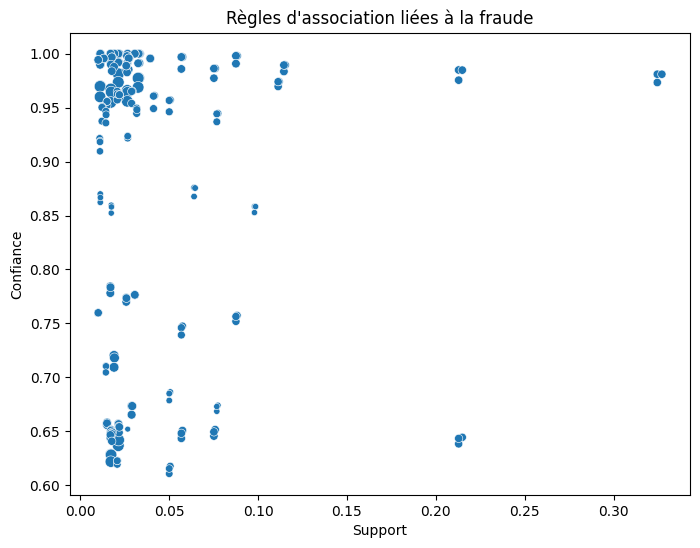

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules_fraud, legend=False)
plt.title("Règles d'association liées à la fraude")
plt.xlabel("Support")
plt.ylabel("Confiance")
plt.show()


# Modélisation(Random Forest)

In [ ]:
# df_transactions = ton dataset après pattern mining
df = df_transactions.copy()

# Cible
y = df['fraud_1']
X = df.drop(columns=['fraud_0', 'fraud_1'])

Création des features à partir des règles filtrées

In [ ]:
# Exemple avec 3 règles filtrées (tu peux en ajouter d'autres)
rules_to_use = [
    ['category_13', 'gender_0'],
    ['category_13', 'age_bin_Jeune', 'gender_0'],
    ['category_13', 'age_bin_Jeune']
]

# Fonction pour créer feature binaire
def apply_rule(df, antecedents, feature_name):
    df[feature_name] = df[antecedents].all(axis=1).astype(int)
    return df

# Appliquer les règles
for i, antecedents in enumerate(rules_to_use):
    feature_name = f'rule_{i+1}_applies'
    df = apply_rule(df, antecedents, feature_name)

# Mettre à jour X
X = df.drop(columns=['fraud_0', 'fraud_1'])


Split train set and test ste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Entraîner le modèle

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    n_jobs=-1  # utilise tous les cœurs CPU
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

Évaluer la performance

              precision    recall  f1-score   support

       False       0.98      0.96      0.97      2000
        True       0.94      0.98      0.96      1440

    accuracy                           0.97      3440
   macro avg       0.96      0.97      0.96      3440
weighted avg       0.97      0.97      0.97      3440

ROC AUC: 0.9941703125


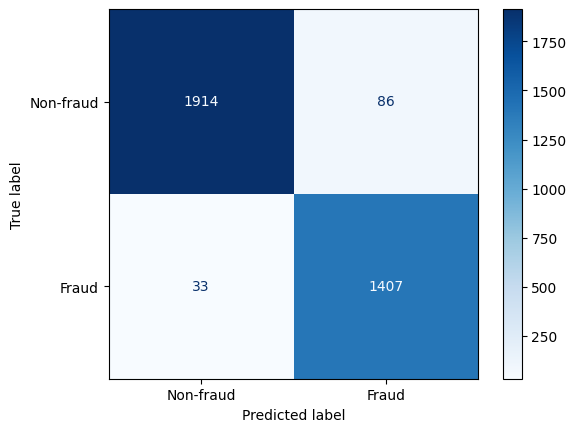

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Classification report
print(classification_report(y_test, y_pred))

# ROC AUC
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()




Diagonale : bonnes prédictions → 1914 non-fraudes correctes et 1407 fraudes correctes.

Hors diagonale : erreurs → 86 fois le modèle a dit fraude alors que ce n’était pas le cas (faux positif), 33 fois il a raté une fraude (faux négatif).

Conclusion : le modèle est très bon pour détecter la fraude et les transactions normales.

Affichage de résultat

In [ ]:
# Par exemple, choisir le premier arbre du Random Forest
tree = rf.estimators_[0]

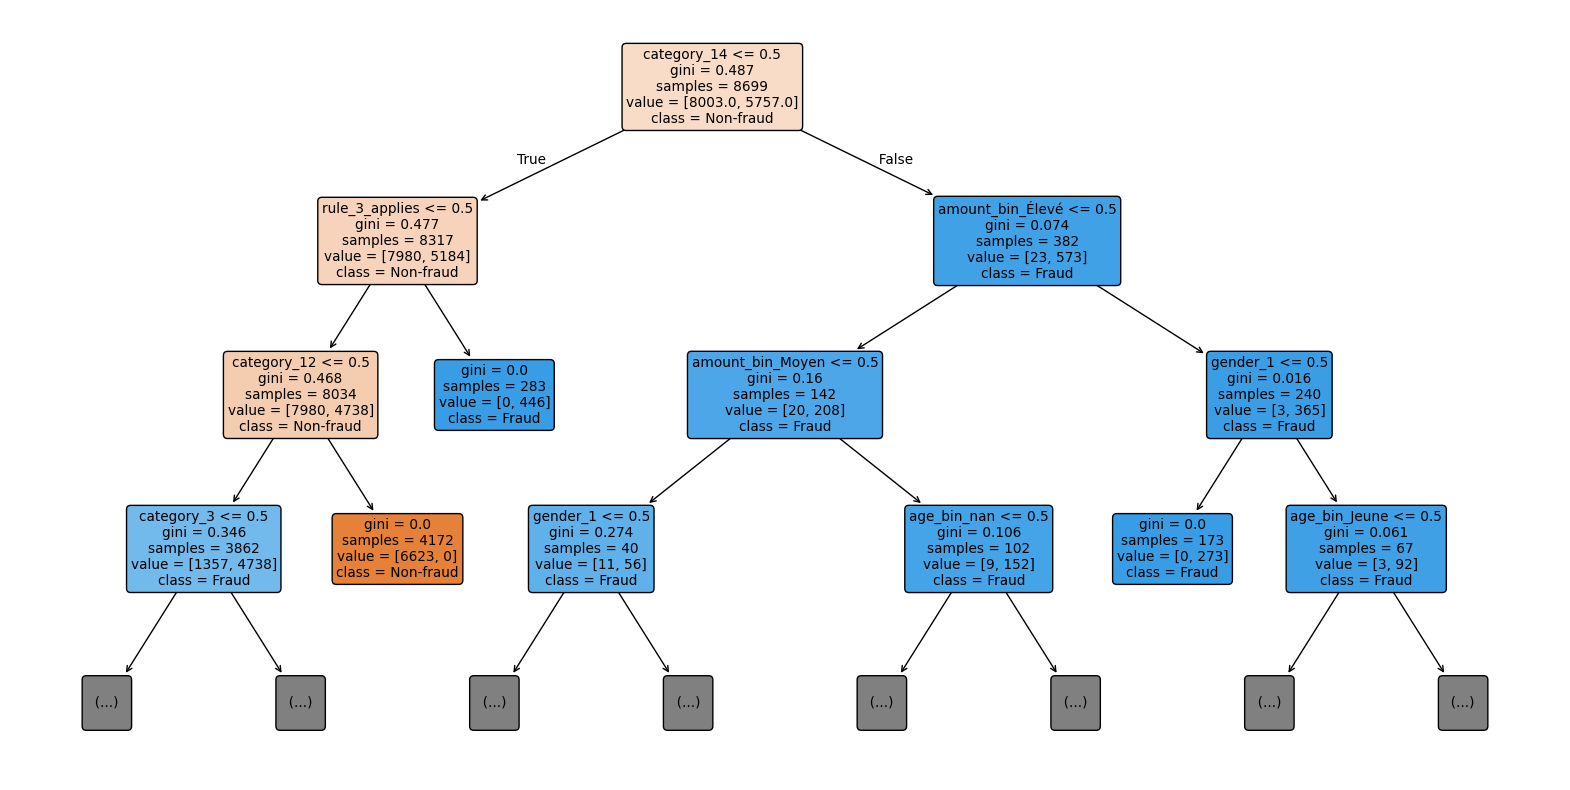

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # largeur et hauteur pour lisibilité
plot_tree(tree,
          feature_names=X.columns,
          class_names=['Non-fraud', 'Fraud'],
          filled=True,    # couleurs selon la classe
          rounded=True,
          max_depth=3)    # limite la profondeur pour lisibilité
plt.show()

